USER_AGENT environment variable not set, consider setting it to identify your requests.
e:\Docs\aia\adaptive_rag\.venv\Lib\site-packages\langsmith\client.py:280: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


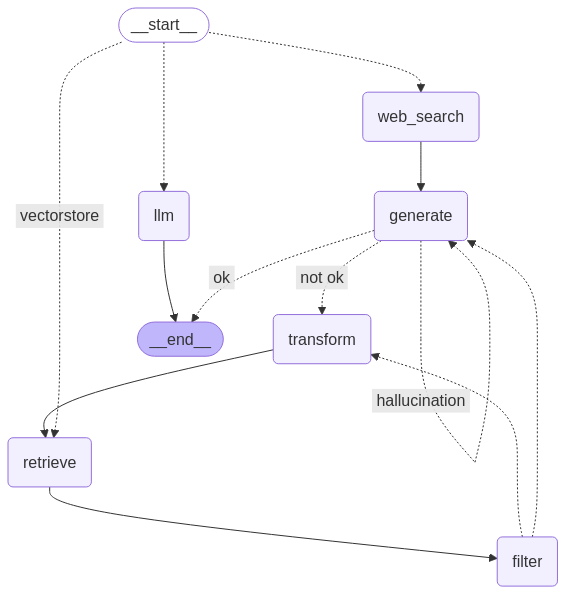

In [1]:
from pprint import pprint
from IPython.display import Image, display

from adaptive_rag.graph import app


try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [2]:
# Run
inputs = {
    "question": "What player at the Bears expected to draft first in the 2024 NFL draft?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)

# Final generation
pprint(value["generation"])

@trace. edge: router
Routing question 'What player at the Bears expected to draft first in the 2024 NFL draft?' to web_search
@trace. node: web_search
"Node 'web_search':"
@trace. node: generate
@trace. edge: grade
Decision: Generation is grounded in documents.
Check if generation answers question...
Decision: Generation addresses the question.
"Node 'generate':"
('The Chicago Bears are expected to draft quarterback Caleb Williams from USC '
 'with the first overall pick in the 2024 NFL Draft. This has been the '
 'consensus since they traded Justin Fields in March. Williams is seen as the '
 'future savior at quarterback for the Bears.')


In [3]:
# Common question như này thì để model tự trả lời luôn -> đỡ mất thời gian => thêm một option cho router
inputs = {
    "question": "What is the capital of Vietnam?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

@trace. edge: router
Routing question 'What is the capital of Vietnam?' to llm
@trace. node: llm
"Node 'llm':"
'\n---\n'
AIMessage(content='The capital of Vietnam is Hanoi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 38, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_38647f5e19', 'id': 'chatcmpl-BOdJ6Xgryr9ONilXWDbuwlX69PJfy', 'finish_reason': 'stop', 'logprobs': None}, id='run-60653168-8e73-4d1f-b8d1-e1536fe3d731-0', usage_metadata={'input_tokens': 38, 'output_tokens': 8, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})


In [4]:
# Run
inputs = {"question": "What are the types of agent memory?"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

@trace. edge: router
Routing question 'What are the types of agent memory?' to vectorstore
@trace. node: retrieve
"Node 'retrieve':"
'\n---\n'
@trace. node: filter
@trace. edge: decide
Decision: Generate answer...
"Node 'filter':"
'\n---\n'
@trace. node: generate
@trace. edge: grade
Decision: Generation is grounded in documents.
Check if generation answers question...
Decision: Generation addresses the question.
"Node 'generate':"
'\n---\n'
('The types of agent memory include sensory memory (retaining raw sensory '
 'input impressions briefly), short-term memory (in-context learning within '
 "the model's finite context window), and long-term memory (external vector "
 'stores enabling extended information retention and fast retrieval). '
 'Short-term memory handles immediate information for tasks, while long-term '
 'memory supports recalling information over extended periods.')


In [1]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")
print(prompt)

e:\Docs\aia\adaptive_rag\.venv\Lib\site-packages\langsmith\client.py:280: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


In [9]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [7]:
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.prompts.chat import HumanMessagePromptTemplate

# Step 1: Define the inner string prompt
template = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use three sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context} \n"
    "Answer:"
)

# Step 2: Create a PromptTemplate
prompt_template = PromptTemplate.from_template(template)

# Step 3: Wrap it as a HumanMessagePromptTemplate
human_message_prompt = HumanMessagePromptTemplate(prompt=prompt_template)

# Step 4: Wrap it in a ChatPromptTemplate
chat_prompt = ChatPromptTemplate.from_messages([human_message_prompt])


In [13]:
chat_prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [14]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [15]:
a = (
    "hello "
    "world"
)

In [16]:
a

'hello world'

In [18]:
"hello " "world"

'hello world'